In [ ]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num
import seaborn as sns
from datetime import datetime, time, timedelta
from scipy import stats as st

In [ ]:
#чтение файлов

#Whale
whale_1 = pd.read_excel('Empires___Puzzles_Whale.xlsx', sheet_name='Расшифровка')
whale_2 = pd.read_excel('Empires___Puzzles_Whale.xlsx', sheet_name='Videolength')

#non-payinhg
non_pay_1 = pd.read_excel('Empires___Puzzles_Non-Paying.xlsx', sheet_name='Расшифровка')
non_pay_2 = pd.read_excel('Empires___Puzzles_Non-Paying.xlsx', sheet_name='Videolength')

whale_2.head()

C:\Users\Vasiliy\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,#,Whale,Time,Day,Session
0,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,1,1
1,1.2,https://youtu.be/SSuTcnH03d4?list=PLTjhk5BwsiV...,00:08:03,1,1
2,1.3,https://youtu.be/EL26rnKiEBI?list=PLTjhk5BwsiV...,00:09:33,1,1
3,2.1,https://youtu.be/TyJyBWg0z7w?list=PLTjhk5BwsiV...,00:22:46,1,2
4,2.2,https://youtu.be/gKEElPrlPIU?list=PLTjhk5BwsiV...,00:58:23,1,2


In [ ]:
#Всего сессий у разных игроков
s_count_whale = len(whale_1['Session'].unique())
s_count_non = len(non_pay_1['Session'].unique())

print(f"Всего сессий у платящего игрока - {s_count_whale}")
print(f"Всего сессий у неплатящего игрока - {s_count_non}")

Всего сессий у платящего игрока - 35
Всего сессий у неплатящего игрока - 41


# 1 Разница побед и проигрышей

In [ ]:
#Платящий игрок
#Победы/Проигрыши в компании
win_def_camp_whale = whale_1[(whale_1['Tag'] == 'Campaign') & (whale_1['Action'] == 'Finish Battle')]
#Победы/Проигрыши в рейде
win_def_raid_whale = whale_1[(whale_1['Tag'] == 'Raid') & (whale_1['Action'] == 'Finish Battle')]

print("Платящий игрок")
print(win_def_camp_whale['Result'].value_counts())
print(win_def_raid_whale['Result'].value_counts())


#Неплатящий игрок
#Победы/Проигрыши в компании
win_def_camp_non_pay = non_pay_1[(non_pay_1['Tag'] == 'Campaign') & (non_pay_1['Action'] == 'Finish Battle')]
#Победы/Проигрыши в рейде
win_def_raid_non_pay = non_pay_1[(non_pay_1['Tag'] == 'Raid') & (non_pay_1['Action'] == 'Finish Battle')]

print("\nНеплатящий игрок")
print(win_def_camp_non_pay['Result'].value_counts())
print(win_def_raid_non_pay['Result'].value_counts())

Платящий игрок
Victory    212
Defeat       3
Name: Result, dtype: int64
Victory    151
Defeat      59
Name: Result, dtype: int64

Неплатящий игрок
Victory    167
Defeat      49
Name: Result, dtype: int64
Victory    122
Defeat      52
Name: Result, dtype: int64


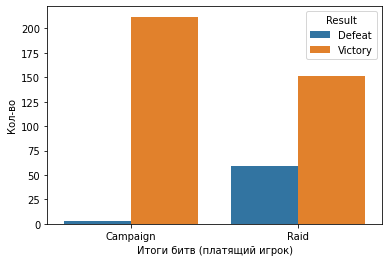

In [ ]:
#Столбчатая диаграмма побед/проигрышей (платящий игрок)

#Сводная таблица и запрос
whale_pivot = pd.pivot_table(whale_1, index = ['Tag', 'Action', 'Result'], aggfunc='count')
whale_win_rate = whale_pivot[['Timelink']].query('Tag == ["Raid", "Campaign"] & Action == ["Finish Battle"]').reset_index()

#whale_win_rate

sns.barplot(x = "Tag", y = "Timelink", hue = "Result", data = whale_win_rate) 
plt.xlabel('Итоги битв (платящий игрок)')
plt.ylabel('Кол-во')
plt.show()

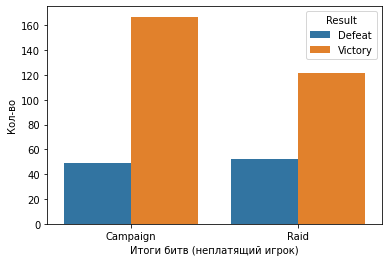

In [ ]:
#Столбчатая диаграмма побед/проигрышей (неплатящий игрок)

#Сводная таблица и запрос
non_pay_pivot = pd.pivot_table(non_pay_1, index = ['Tag', 'Action', 'Result'], aggfunc='count')
non_pay_win_rate = non_pay_pivot[['Timelink']].query('Tag == ["Raid", "Campaign"] & Action == ["Finish Battle"]').reset_index()

#non_pay_win_rate

sns.barplot(x = "Tag", y = "Timelink", hue = "Result", data = non_pay_win_rate)
plt.xlabel('Итоги битв (неплатящий игрок)')
plt.ylabel('Кол-во')
plt.show()

## Стат.значимость разницы побед/проигрышей

In [ ]:
#Создание столбца по результатам битв в компании

#Платящий игрок
whale_win_rate_camp = whale_1[['Tag','Action', 'Result']].query('Tag == ["Campaign"] & Action == ["Finish Battle"]')
whale_win_rate_camp['Win/Def'] = whale_win_rate_camp['Result'].apply(lambda x: 1 if x == 'Victory' else 0)
#whale_win_rate_camp

#Неплатящий игрок
np_win_rate_camp = non_pay_1[['Tag','Action', 'Result']].query('Tag == ["Campaign"] & Action == ["Finish Battle"]')
np_win_rate_camp['Win/Def'] = np_win_rate_camp['Result'].apply(lambda x: 1 if x == 'Victory' else 0)
#np_win_rate_camp

In [ ]:
alpha = 0.05
 
#     H0: Игроки выигрывают и проигрывают одинаково
#     H1: Игроки выигрывают и проигрывают разное кол-во раз

result = st.ttest_ind(whale_win_rate_camp['Win/Def'], np_win_rate_camp['Win/Def'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=7.176552576391654, pvalue=8.209188822296784e-12)
Отвергаем нулевую гипотезу


In [ ]:
#Создание столбца по результатам битв в рейде

#Платящий игрок
whale_win_rate_raid= whale_1[['Tag','Action', 'Result']].query('Tag == ["Raid"] & Action == ["Finish Battle"]')
whale_win_rate_raid['Win/Def'] = whale_win_rate_raid['Result'].apply(lambda x: 1 if x == 'Victory' else 0)
#whale_win_rate_camp

#Неплатящий игрок
np_win_rate_raid = non_pay_1[['Tag','Action', 'Result']].query('Tag == ["Raid"] & Action == ["Finish Battle"]')
np_win_rate_raid['Win/Def'] = np_win_rate_raid['Result'].apply(lambda x: 1 if x == 'Victory' else 0)
#np_win_rate_camp

In [ ]:
alpha = 0.05
 
#     H0: Игроки выигрывают и проигрывают одинаково
#     H1: Игроки выигрывают и проигрывают разное кол-во раз

result = st.ttest_ind(whale_win_rate_raid['Win/Def'], np_win_rate_raid['Win/Def'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=0.46914718980760867, pvalue=0.6392426392502735)
Не отвергаем нулевую гипотезу


# 2 Участие в разных режимах (Campaign/Raid)

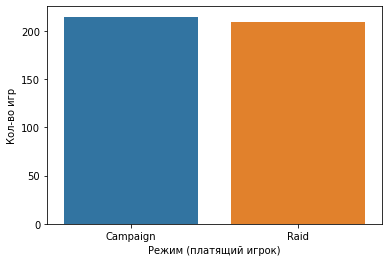

In [ ]:
#Столбчатая диаграмма кол-вы игр в режимах (платящий игрок)

#Сводная таблица и запрос
whale_pivot = pd.pivot_table(whale_1, index = ['Tag', 'Action'], aggfunc='count')
whale_gam_mod = whale_pivot[['Timelink']].query('Tag == ["Raid", "Campaign"] & Action == ["Finish Battle"]').reset_index()

#whale_gam_mod

sns.barplot(x = "Tag", y = "Timelink", data = whale_gam_mod)
plt.xlabel('Режим (платящий игрок)')
plt.ylabel('Кол-во игр')
plt.show()

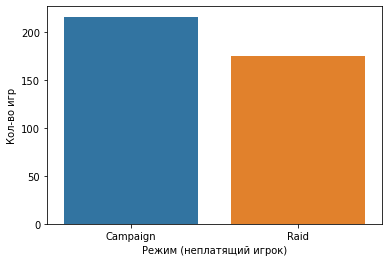

In [ ]:
#Столбчатая диаграмма кол-вы игр в режимах (неплатящий игрок)

#Сводная таблица и запрос
non_pay_pivot = pd.pivot_table(non_pay_1, index = ['Tag', 'Action'], aggfunc='count')
non_pay_gam_mod = non_pay_pivot[['Timelink']].query('Tag == ["Raid", "Campaign"] & Action == ["Finish Battle"]').reset_index()

#non_pay_win_rate

sns.barplot(x = "Tag", y = "Timelink", data = non_pay_gam_mod)
plt.xlabel('Режим (неплатящий игрок)')
plt.ylabel('Кол-во игр')
plt.show()

### Стат.значимость различия в выборе режима

In [ ]:
#Платящий игрок
whale_gam_mod = whale_1[['Tag','Action', 'Result']].query('Tag == ["Campaign", "Raid"] & Action == ["Finish Battle"]')
whale_gam_mod['Camp/Raid'] = whale_gam_mod['Tag'].apply(lambda x: 1 if x == 'Campaign' else 0)
#whale_gam_mod


#Неплатящий игрок
np_gam_mod = non_pay_1[['Tag','Action', 'Result']].query('Tag == ["Campaign", "Raid"] & Action == ["Start Battle"]')
np_gam_mod['Camp/Raid'] = np_gam_mod['Result'].apply(lambda x: 1 if x == 'Victory' else 0)
#np_gam_mod

alpha = 0.05
 
#     H0: Игроки проводят в режимах одиноковое количество раз
#     H1: Игроки проводят в режимах разное количество раз

result = st.ttest_ind(np_gam_mod['Camp/Raid'], whale_gam_mod['Camp/Raid'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-20.834952318045705, pvalue=6.714651279054364e-67)
Отвергаем нулевую гипотезу


# 3 Кол-во сессий в день

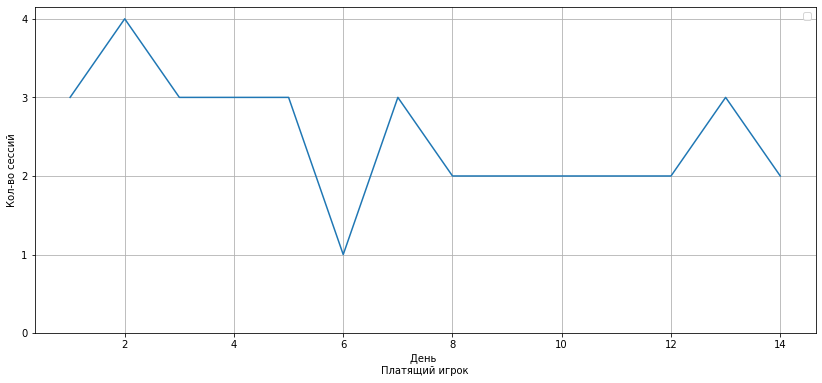

In [ ]:
#Кол-во сессий в день у платящего
whale_ses_count = {'Session': ['nunique']}
whale_ses_per_day = whale_2.groupby(['Day']).agg(whale_ses_count).reset_index()

#whale_ses_per_day
#whale_ses_per_day[{'Session':['nunique']}].sum() #общее кол-во сессий
#строю график кол-ва сессий по дням
whale_ses_per_day.plot.line(x='Day', y= whale_ses_count, figsize=(14,6),
                            grid=True, yticks =[0, 1, 2, 3, 4],
                            xlabel = "День \nПлатящий игрок",
                            ylabel = "Кол-во сессий")
plt.legend([])

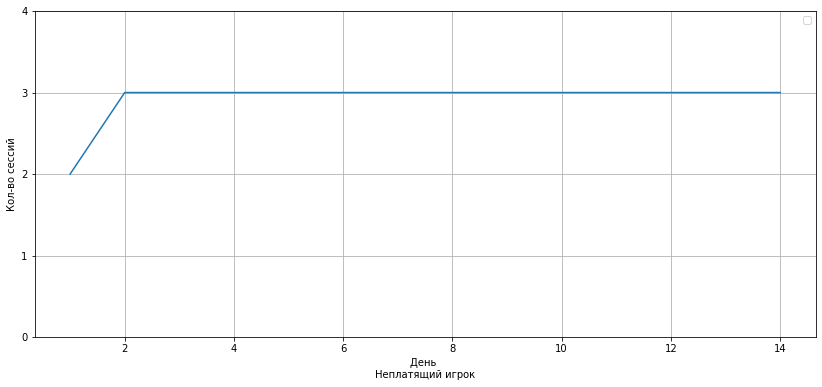

In [ ]:
#Кол-во сессий в день у неплатящего
non_pay_ses_count = {'Session': ['nunique']}
non_pay_ses_per_day = non_pay_2.groupby(['Day']).agg(non_pay_ses_count).reset_index()

#non_pay_ses_per_day
#non_pay_ses_per_day[{'Session':['nunique']}].sum() #общее кол-во сессий
#строю график кол-ва сессий по дням
non_pay_ses_per_day.plot.line(x='Day', y= non_pay_ses_count, figsize=(14,6),
                              grid=True, yticks =[0, 1, 2, 3, 4],
                              xlabel = "День \nНеплатящий игрок",
                              ylabel = "Кол-во сессий")
plt.legend([])

### Стат.значимость отличия наигранных сессий в день

In [ ]:
alpha = 0.05
 
#     H0: Игроки проводят в игре в среднем одинаковое кол-во сессий
#     H1: Игроки проводят в игре среднем разное кол-во сессий 

result = st.ttest_ind(whale_ses_per_day['Session'], non_pay_ses_per_day['Session'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=array([-1.99150739]), pvalue=array([0.06359427]))
Не отвергаем нулевую гипотезу


# 4 Продолжительность игры по сессиям

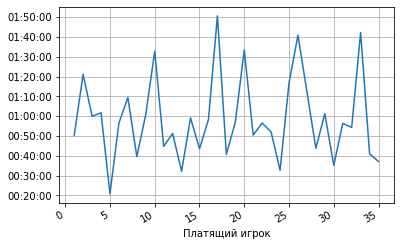

In [ ]:
#Линейный график продолжительностти сессий в разрезе кол-ва сессий (платящий игрок)
#Перевод длительностти сессий в секунды
def time2sec(y):
    '''
         Тип времени часы, минуты и секунды конвертируются в секунды
    '''
    h = y.hour  # Прямое использование встроенного метода модуля datetime.time для получения часов, минут и секунд
    m = y.minute
    s = y.second
    return int(h)*3600 + int(m)*60 + int(s) #int () преобразование функции в целочисленную операцию

whale_2 = pd.read_excel('Empires___Puzzles_Whale.xlsx', sheet_name='Videolength') #определение переменной whale_2
whale_2['Time']= whale_2['Time'].apply(time2sec)

#Группировка по сессиям
whale_ses_time = whale_2.groupby(['Session']).agg(sum).reset_index()

#Перевод в ЧЧ:ММ:СС (строковые значения)
def sec2time(sec, n_msec=0):
    ''' Convert seconds to 'D days, HH:MM:SS.FFF' '''
    if hasattr(sec,'__len__'):
        return [sec2time(s) for s in sec]
    m, s = divmod(sec, 60)
    h, m = divmod(m, 60)
    d, h = divmod(h, 24)
    if n_msec > 0:
        pattern = '%%02d:%%02d:%%0%d.%df' % (n_msec+3, n_msec)
    else:
        pattern = r'%02d:%02d:%02d'
    if d == 0:
        return pattern % (h, m, s)
    return ('%d days, ' + pattern) % (d, h, m, s)

whale_ses_time['Time']= whale_ses_time['Time'].apply(sec2time)

#График
whale_ses_time['Time'] = pd.to_datetime(whale_ses_time['Time'])
fig, ax = plt.subplots()

myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)

ax.plot(whale_ses_time['Session'], whale_ses_time['Time'])

plt.gcf().autofmt_xdate()
plt.grid()
plt.xlabel('Платящий игрок')
plt.show()

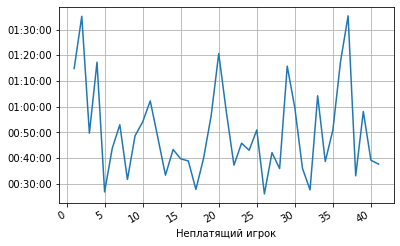

In [ ]:
#Линейный график продолжительностти сессий в разрезе кол-ва сессий (неплатящий игрок)
#Перевод длительностти сессий в секунды
def time2sec(y):
    '''
         Тип времени часы, минуты и секунды конвертируются в секунды
    '''
    h = y.hour  # Прямое использование встроенного метода модуля datetime.time для получения часов, минут и секунд
    m = y.minute
    s = y.second
    return int(h)*3600 + int(m)*60 + int(s) #int () преобразование функции в целочисленную операцию

non_pay_2 = pd.read_excel('Empires___Puzzles_Non-Paying.xlsx', sheet_name='Videolength') #определение переменной non_pay_2
non_pay_2['Time']= non_pay_2['Time'].apply(time2sec)

#Группировка по сессиям
non_pay_ses_time = non_pay_2.groupby(['Session']).agg(sum).reset_index()

#Перевод в ЧЧ:ММ:СС (строковые значения)
def sec2time(sec, n_msec=0):
    ''' Convert seconds to 'D days, HH:MM:SS.FFF' '''
    if hasattr(sec,'__len__'):
        return [sec2time(s) for s in sec]
    m, s = divmod(sec, 60)
    h, m = divmod(m, 60)
    d, h = divmod(h, 24)
    if n_msec > 0:
        pattern = '%%02d:%%02d:%%0%d.%df' % (n_msec+3, n_msec)
    else:
        pattern = r'%02d:%02d:%02d'
    if d == 0:
        return pattern % (h, m, s)
    return ('%d days, ' + pattern) % (d, h, m, s)

non_pay_ses_time['Time']= non_pay_ses_time['Time'].apply(sec2time)

#График
non_pay_ses_time['Time'] = pd.to_datetime(non_pay_ses_time['Time'])
fig, ax = plt.subplots()

myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)

ax.plot(non_pay_ses_time['Session'], non_pay_ses_time['Time'])

plt.gcf().autofmt_xdate()
plt.xlabel('Неплатящий игрок')
plt.grid()
plt.show()

### Стат.значимость отличия продолжительности сессий

In [ ]:
alpha = 0.05
 
#     H0: Игроки проводят в игре в среднем одинаковое кол-во времени в сессиях
#     H1: Игроки проводят в игре среднем разное кол-во времени в сессиях

result = st.ttest_ind(whale_ses_time['Time'], non_pay_ses_time['Time'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=1.8747687195836884, pvalue=0.06520653636833211)
Не отвергаем нулевую гипотезу


# 5 Продолжительность игры по дням

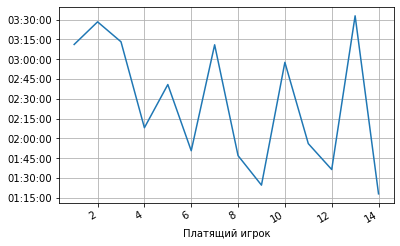

In [ ]:
#Линейный график продолжительностти сессий в разрезе кол-ва дней (платящий игрок)
#Перевод длительностти сессий в секунды
def time2sec(y):
    '''
         Тип времени часы, минуты и секунды конвертируются в секунды
    '''
    h = y.hour  # Прямое использование встроенного метода модуля datetime.time для получения часов, минут и секунд
    m = y.minute
    s = y.second
    return int(h)*3600 + int(m)*60 + int(s) #int () преобразование функции в целочисленную операцию

whale_2 = pd.read_excel('Empires___Puzzles_Whale.xlsx', sheet_name='Videolength') #определение переменной whale_2
whale_2['Time']= whale_2['Time'].apply(time2sec)

#Группировка по сессиям
whale_day_time = whale_2.groupby(['Day']).agg(sum).reset_index()

#Перевод в ЧЧ:ММ:СС (строковые значения)
def sec2time(sec, n_msec=0):
    ''' Convert seconds to 'D days, HH:MM:SS.FFF' '''
    if hasattr(sec,'__len__'):
        return [sec2time(s) for s in sec]
    m, s = divmod(sec, 60)
    h, m = divmod(m, 60)
    d, h = divmod(h, 24)
    if n_msec > 0:
        pattern = '%%02d:%%02d:%%0%d.%df' % (n_msec+3, n_msec)
    else:
        pattern = r'%02d:%02d:%02d'
    if d == 0:
        return pattern % (h, m, s)
    return ('%d days, ' + pattern) % (d, h, m, s)

whale_day_time['Time']= whale_day_time['Time'].apply(sec2time)

#График
whale_day_time['Time'] = pd.to_datetime(whale_day_time['Time'])
fig, ax = plt.subplots()

myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)

ax.plot(whale_day_time['Day'], whale_day_time['Time'])

plt.gcf().autofmt_xdate()
plt.grid()
plt.xlabel('Платящий игрок')
plt.show()

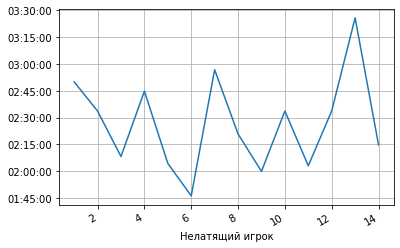

In [ ]:
#Линейный график продолжительностти сессий в разрезе кол-ва дней (неплатящий игрок)
#Перевод длительностти сессий в секунды
def time2sec(y):
    '''
         Тип времени часы, минуты и секунды конвертируются в секунды
    '''
    h = y.hour  # Прямое использование встроенного метода модуля datetime.time для получения часов, минут и секунд
    m = y.minute
    s = y.second
    return int(h)*3600 + int(m)*60 + int(s) #int () преобразование функции в целочисленную операцию

non_pay_2 = pd.read_excel('Empires___Puzzles_Non-Paying.xlsx', sheet_name='Videolength') #определение переменной non_pay_2
non_pay_2['Time']= non_pay_2['Time'].apply(time2sec)

#Группировка по сессиям
non_pay_day_time = non_pay_2.groupby(['Day']).agg(sum).reset_index()

#Перевод в ЧЧ:ММ:СС (строковые значения)
def sec2time(sec, n_msec=0):
    ''' Convert seconds to 'D days, HH:MM:SS.FFF' '''
    if hasattr(sec,'__len__'):
        return [sec2time(s) for s in sec]
    m, s = divmod(sec, 60)
    h, m = divmod(m, 60)
    d, h = divmod(h, 24)
    if n_msec > 0:
        pattern = '%%02d:%%02d:%%0%d.%df' % (n_msec+3, n_msec)
    else:
        pattern = r'%02d:%02d:%02d'
    if d == 0:
        return pattern % (h, m, s)
    return ('%d days, ' + pattern) % (d, h, m, s)

non_pay_day_time['Time']= non_pay_day_time['Time'].apply(sec2time)

#График
non_pay_day_time['Time'] = pd.to_datetime(non_pay_day_time['Time'])
fig, ax = plt.subplots()

myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)

ax.plot(non_pay_day_time['Day'], non_pay_day_time['Time'])

plt.gcf().autofmt_xdate()
plt.grid()
plt.xlabel('Нелатящий игрок')
plt.show()

### Стат.значимость отличия продолжительности игрового времени в день

In [ ]:
alpha = 0.05
 
#     H0: Игроки проводят в игре в среднем одинаковое кол-во времени в день
#     H1: Игроки проводят в игре среднем разное кол-во времени в день

result = st.ttest_ind(whale_day_time['Time'], non_pay_day_time['Time'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=0.0032093579774847896, pvalue=0.9974707253665258)
Не отвергаем нулевую гипотезу


# 6 Тепловая катра действий

[Text(0.5, 1.0, 'Платящий игрок'),
 Text(0.5, 32.0, 'Кол-во вхождений'),
 Text(32.99999999999999, 0.5, 'Tag-Action')]

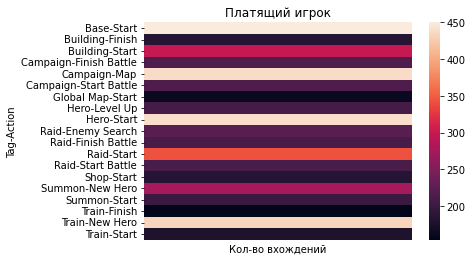

In [ ]:
#Тепловая карта действий (Платящий игрок)
whale_pivot = pd.pivot_table(whale_1, index = ['Tag', 'Action'], aggfunc='count')
wh = whale_pivot[['Timelink']].query('Timelink > 150')
#wh

#график
ax = sns.heatmap(wh,xticklabels= '', vmax=450)


ax.set(title="Платящий игрок",
      xlabel="Кол-во вхождений",
      ylabel="Tag-Action")

[Text(0.5, 1.0, 'Неплатящий игрок'),
 Text(0.5, 32.0, 'Кол-во вхождений'),
 Text(32.99999999999999, 0.5, 'Tag-Action')]

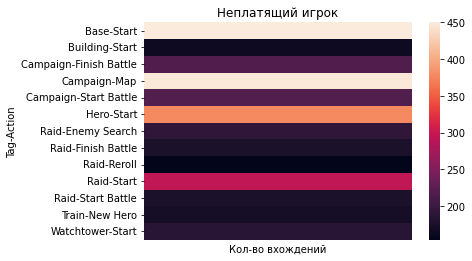

In [ ]:
#Тепловая карта действий (Неплатящий игрок)
non_pay_pivot = pd.pivot_table(non_pay_1, index = ['Tag', 'Action'], aggfunc='count')
npy = non_pay_pivot[['Timelink']].query('Timelink > 150')
#npy

#график
ax = sns.heatmap(npy,xticklabels= '', vmax=450)


ax.set(title="Неплатящий игрок",
      xlabel="Кол-во вхождений",
      ylabel="Tag-Action")